In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sqlite3


# Importing the dataset
conn = sqlite3.connect('database.sqlite')

In [3]:
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('sqlite_sequence',), ('Player_Attributes',), ('Player',), ('Match',), ('League',), ('Country',), ('Team',), ('Team_Attributes',)]


In [4]:
df_league = pd.read_sql_query("select * from League;", conn)
df_league.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [5]:
df_player_attributes = pd.read_sql_query("select * from Player_Attributes;", conn)
df_player = pd.read_sql_query("select * from Player;", conn)
df_match = pd.read_sql_query("select * from Match;", conn)
df_country = pd.read_sql_query("select * from Country;", conn)
df_team_attributes = pd.read_sql_query("select * from Team_Attributes;", conn)
df_team = pd.read_sql_query("select * from Team;", conn)

In [6]:
df_player_attributes.head(1)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


In [7]:
df_player.head(1)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187


In [8]:
df_country.head(1)

,id,name
0,1,Belgium


In [9]:
df_team_attributes.head(1)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover


In [10]:
df_team.head(1)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN


In [11]:
df_match.head(1)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.0,1.65,3.4,4.5,1.78,3.25,4.0,1.73,3.4,4.2


## Checking NULL

In [12]:
df_match.isna().sum()

id                      0
country_id              0
league_id               0
season                  0
stage                   0
date                    0
match_api_id            0
home_team_api_id        0
away_team_api_id        0
home_team_goal          0
away_team_goal          0
home_player_X1       1821
home_player_X2       1821
home_player_X3       1832
home_player_X4       1832
home_player_X5       1832
home_player_X6       1832
home_player_X7       1832
home_player_X8       1832
home_player_X9       1832
home_player_X10      1832
home_player_X11      1832
away_player_X1       1832
away_player_X2       1832
away_player_X3       1832
away_player_X4       1832
away_player_X5       1832
away_player_X6       1832
away_player_X7       1832
away_player_X8       1832
                    ...  
B365H                3387
B365D                3387
B365A                3387
BWH                  3404
BWD                  3404
BWA                  3404
IWH                  3459
IWD         

In [13]:
df_team_attributes.isna().sum()

id                                  0
team_fifa_api_id                    0
team_api_id                         0
date                                0
buildUpPlaySpeed                    0
buildUpPlaySpeedClass               0
buildUpPlayDribbling              969
buildUpPlayDribblingClass           0
buildUpPlayPassing                  0
buildUpPlayPassingClass             0
buildUpPlayPositioningClass         0
chanceCreationPassing               0
chanceCreationPassingClass          0
chanceCreationCrossing              0
chanceCreationCrossingClass         0
chanceCreationShooting              0
chanceCreationShootingClass         0
chanceCreationPositioningClass      0
defencePressure                     0
defencePressureClass                0
defenceAggression                   0
defenceAggressionClass              0
defenceTeamWidth                    0
defenceTeamWidthClass               0
defenceDefenderLineClass            0
dtype: int64

In [14]:
df_team.isna().sum()

id                   0
team_api_id          0
team_fifa_api_id    11
team_long_name       0
team_short_name      0
dtype: int64

In [15]:
df_player.isna().sum()

id                    0
player_api_id         0
player_name           0
player_fifa_api_id    0
birthday              0
height                0
weight                0
dtype: int64

In [16]:
df_player_attributes.isna().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

# Finding similar players


In [17]:
df_player.drop('id',inplace=True,axis=1)
df_player.head(1)

,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187


In [18]:
df_player_attributes.drop('id',inplace=True,axis=1)
df_player_attributes.head(1) 

,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


## Combining Tables to Have Player Name

In [19]:
df_comb_player =  pd.merge(df_player, df_player_attributes, on="player_api_id")

In [20]:
df_comb_player.head(1)

,player_api_id,player_name,player_fifa_api_id_x,birthday,height,weight,player_fifa_api_id_y,date,overall_rating,potential,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,218353,2016-02-18 00:00:00,67.0,71.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


In [21]:
df_comb_player.columns

Index(['player_api_id', 'player_name', 'player_fifa_api_id_x', 'birthday',
       'height', 'weight', 'player_fifa_api_id_y', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [22]:
df_comb_player = df_comb_player.drop(['player_fifa_api_id_x', 'birthday',
       'height', 'weight', 'player_fifa_api_id_y'],axis=1)

In [23]:
import datetime as dt
df_comb_player['date'] = pd.to_datetime(df_comb_player['date'])

# Finding Top Players

In [691]:
def top_N_players(df,year,n=10):
    df_top = df[df['date'].dt.year == year]
    df_top = df_top.sort_values('date').groupby('player_api_id').last()
    return df_top.sort_values('overall_rating').tail(n)

In [692]:
top_N_players(df_comb_player,2016)
df = top_N_players(df_comb_player,2016)[['player_name']]
df.reset_index(level=0, inplace=True)
df.index = range(len(df.index),0,-1)
df.reset_index(level=0, inplace=True)
df.rename( columns={"index":"rank1"},inplace=True)
df_rank =df
#df_rank = pd.merge(df_rank,df,on=["player_api_id","player_name"],how='outer')
df_rank

,rank1,player_api_id,player_name
0,10,30894,Philipp Lahm
1,9,182917,David De Gea
2,8,164684,James Rodriguez
3,7,36378,Mesut Oezil
4,6,107417,Eden Hazard
5,5,93447,Robert Lewandowski
6,4,37412,Sergio Aguero
7,3,30834,Arjen Robben
8,2,27299,Manuel Neuer
9,1,19533,Neymar


In [693]:
top_N_players(df_comb_player,2015)
df = top_N_players(df_comb_player,2015)[['player_name']]
df.reset_index(level=0, inplace=True)
df.index = range(len(df.index),0,-1)
df.reset_index(level=0, inplace=True)
df.rename( columns={"index":"rank2"},inplace=True)
df_rank = pd.merge(df_rank,df,on=["player_api_id","player_name"],how='outer')
df_rank

,rank1,player_api_id,player_name,rank2
0,10.0,30894,Philipp Lahm,NaN
1,9.0,182917,David De Gea,NaN
2,8.0,164684,James Rodriguez,NaN
3,7.0,36378,Mesut Oezil,NaN
4,6.0,107417,Eden Hazard,6.0
5,5.0,93447,Robert Lewandowski,NaN
6,4.0,37412,Sergio Aguero,NaN
7,3.0,30834,Arjen Robben,5.0
8,2.0,27299,Manuel Neuer,4.0
9,1.0,19533,Neymar,8.0


In [694]:
top_N_players(df_comb_player,2014)
df = top_N_players(df_comb_player,2014)[['player_name']]
df.reset_index(level=0, inplace=True)
df.index = range(len(df.index),0,-1)
df.reset_index(level=0, inplace=True)
df.rename( columns={"index":"rank3"},inplace=True)
df_rank = pd.merge(df_rank,df,on=["player_api_id","player_name"],how='outer')
df_rank

,rank1,player_api_id,player_name,rank2,rank3
0,10.0,30894,Philipp Lahm,NaN,NaN
1,9.0,182917,David De Gea,NaN,NaN
2,8.0,164684,James Rodriguez,NaN,NaN
3,7.0,36378,Mesut Oezil,NaN,NaN
4,6.0,107417,Eden Hazard,6.0,10.0
5,5.0,93447,Robert Lewandowski,NaN,NaN
6,4.0,37412,Sergio Aguero,NaN,NaN
7,3.0,30834,Arjen Robben,5.0,4.0
8,2.0,27299,Manuel Neuer,4.0,5.0
9,1.0,19533,Neymar,8.0,NaN


In [695]:
top_N_players(df_comb_player,2013)
df = top_N_players(df_comb_player,2013)[['player_name']]
df.reset_index(level=0, inplace=True)
df.index = range(len(df.index),0,-1)
df.reset_index(level=0, inplace=True)
df.rename( columns={"index":"rank4"},inplace=True)
df_rank = pd.merge(df_rank,df,on=["player_api_id","player_name"],how='outer')
df_rank

,rank1,player_api_id,player_name,rank2,rank3,rank4
0,10.0,30894,Philipp Lahm,NaN,NaN,NaN
1,9.0,182917,David De Gea,NaN,NaN,NaN
2,8.0,164684,James Rodriguez,NaN,NaN,NaN
3,7.0,36378,Mesut Oezil,NaN,NaN,NaN
4,6.0,107417,Eden Hazard,6.0,10.0,NaN
5,5.0,93447,Robert Lewandowski,NaN,NaN,NaN
6,4.0,37412,Sergio Aguero,NaN,NaN,NaN
7,3.0,30834,Arjen Robben,5.0,4.0,9.0
8,2.0,27299,Manuel Neuer,4.0,5.0,NaN
9,1.0,19533,Neymar,8.0,NaN,NaN


In [696]:
top_N_players(df_comb_player,2012)
df = top_N_players(df_comb_player,2012)[['player_name']]
df.reset_index(level=0, inplace=True)
df.index = range(len(df.index),0,-1)
df.reset_index(level=0, inplace=True)
df.rename( columns={"index":"rank5"},inplace=True)
df_rank = pd.merge(df_rank,df,on=["player_api_id","player_name"],how='outer')
df_rank

,rank1,player_api_id,player_name,rank2,rank3,rank4,rank5
0,10.0,30894,Philipp Lahm,NaN,NaN,NaN,NaN
1,9.0,182917,David De Gea,NaN,NaN,NaN,NaN
2,8.0,164684,James Rodriguez,NaN,NaN,NaN,NaN
3,7.0,36378,Mesut Oezil,NaN,NaN,NaN,NaN
4,6.0,107417,Eden Hazard,6.0,10.0,NaN,NaN
5,5.0,93447,Robert Lewandowski,NaN,NaN,NaN,NaN
6,4.0,37412,Sergio Aguero,NaN,NaN,NaN,NaN
7,3.0,30834,Arjen Robben,5.0,4.0,9.0,NaN
8,2.0,27299,Manuel Neuer,4.0,5.0,NaN,NaN
9,1.0,19533,Neymar,8.0,NaN,NaN,NaN


In [697]:
top_N_players(df_comb_player,2011)
df = top_N_players(df_comb_player,2011)[['player_name']]
df.reset_index(level=0, inplace=True)
df.index = range(len(df.index),0,-1)
df.reset_index(level=0, inplace=True)
df.rename( columns={"index":"rank6"},inplace=True)
df_rank = pd.merge(df_rank,df,on=["player_api_id","player_name"],how='outer')
df_rank

,rank1,player_api_id,player_name,rank2,rank3,rank4,rank5,rank6
0,10.0,30894,Philipp Lahm,NaN,NaN,NaN,NaN,NaN
1,9.0,182917,David De Gea,NaN,NaN,NaN,NaN,NaN
2,8.0,164684,James Rodriguez,NaN,NaN,NaN,NaN,NaN
3,7.0,36378,Mesut Oezil,NaN,NaN,NaN,NaN,NaN
4,6.0,107417,Eden Hazard,6.0,10.0,NaN,NaN,NaN
5,5.0,93447,Robert Lewandowski,NaN,NaN,NaN,NaN,NaN
6,4.0,37412,Sergio Aguero,NaN,NaN,NaN,NaN,NaN
7,3.0,30834,Arjen Robben,5.0,4.0,9.0,NaN,5.0
8,2.0,27299,Manuel Neuer,4.0,5.0,NaN,NaN,NaN
9,1.0,19533,Neymar,8.0,NaN,NaN,NaN,NaN


In [698]:
top_N_players(df_comb_player,2010)
df = top_N_players(df_comb_player,2010)[['player_name']]
df.reset_index(level=0, inplace=True)
df.index = range(len(df.index),0,-1)
df.reset_index(level=0, inplace=True)
df.rename( columns={"index":"rank7"},inplace=True)
df_rank = pd.merge(df_rank,df,on=["player_api_id","player_name"],how='outer')
df_rank

,rank1,player_api_id,player_name,rank2,rank3,rank4,rank5,rank6,rank7
0,10.0,30894,Philipp Lahm,NaN,NaN,NaN,NaN,NaN,NaN
1,9.0,182917,David De Gea,NaN,NaN,NaN,NaN,NaN,NaN
2,8.0,164684,James Rodriguez,NaN,NaN,NaN,NaN,NaN,NaN
3,7.0,36378,Mesut Oezil,NaN,NaN,NaN,NaN,NaN,NaN
4,6.0,107417,Eden Hazard,6.0,10.0,NaN,NaN,NaN,NaN
5,5.0,93447,Robert Lewandowski,NaN,NaN,NaN,NaN,NaN,NaN
6,4.0,37412,Sergio Aguero,NaN,NaN,NaN,NaN,NaN,NaN
7,3.0,30834,Arjen Robben,5.0,4.0,9.0,NaN,5.0,NaN
8,2.0,27299,Manuel Neuer,4.0,5.0,NaN,NaN,NaN,NaN
9,1.0,19533,Neymar,8.0,NaN,NaN,NaN,NaN,NaN


In [699]:
top_N_players(df_comb_player,2009)
df = top_N_players(df_comb_player,2009)[['player_name']]
df.reset_index(level=0, inplace=True)
df.index = range(len(df.index),0,-1)
df.reset_index(level=0, inplace=True)
df.rename( columns={"index":"rank8"},inplace=True)
df_rank = pd.merge(df_rank,df,on=["player_api_id","player_name"],how='outer')
df_rank

,rank1,player_api_id,player_name,rank2,rank3,rank4,rank5,rank6,rank7,rank8
0,10.0,30894,Philipp Lahm,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9.0,182917,David De Gea,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8.0,164684,James Rodriguez,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7.0,36378,Mesut Oezil,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6.0,107417,Eden Hazard,6.0,10.0,NaN,NaN,NaN,NaN,NaN
5,5.0,93447,Robert Lewandowski,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4.0,37412,Sergio Aguero,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3.0,30834,Arjen Robben,5.0,4.0,9.0,NaN,5.0,NaN,NaN
8,2.0,27299,Manuel Neuer,4.0,5.0,NaN,NaN,NaN,NaN,NaN
9,1.0,19533,Neymar,8.0,NaN,NaN,NaN,NaN,NaN,NaN


In [700]:
top_N_players(df_comb_player,2008)
df = top_N_players(df_comb_player,2008)[['player_name']]
df.reset_index(level=0, inplace=True)
df.index = range(len(df.index),0,-1)
df.reset_index(level=0, inplace=True)
df.rename( columns={"index":"rank9"},inplace=True)
df_rank = pd.merge(df_rank,df,on=["player_api_id","player_name"],how='outer')
df_rank

,rank1,player_api_id,player_name,rank2,rank3,rank4,rank5,rank6,rank7,rank8,rank9
0,10.0,30894,Philipp Lahm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9.0,182917,David De Gea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8.0,164684,James Rodriguez,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7.0,36378,Mesut Oezil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6.0,107417,Eden Hazard,6.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
5,5.0,93447,Robert Lewandowski,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4.0,37412,Sergio Aguero,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3.0,30834,Arjen Robben,5.0,4.0,9.0,NaN,5.0,NaN,NaN,NaN
8,2.0,27299,Manuel Neuer,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
9,1.0,19533,Neymar,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [701]:
top_N_players(df_comb_player,2007)
df = top_N_players(df_comb_player,2007)[['player_name']]
df.reset_index(level=0, inplace=True)
df.index = range(len(df.index),0,-1)
df.reset_index(level=0, inplace=True)
df.rename( columns={"index":"rank10"},inplace=True)
df_rank = pd.merge(df_rank,df,on=["player_api_id","player_name"],how='outer')
df_rank

,rank1,player_api_id,player_name,rank2,rank3,rank4,rank5,rank6,rank7,rank8,rank9,rank10
0,10.0,30894,Philipp Lahm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9.0,182917,David De Gea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8.0,164684,James Rodriguez,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7.0,36378,Mesut Oezil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6.0,107417,Eden Hazard,6.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5.0,93447,Robert Lewandowski,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4.0,37412,Sergio Aguero,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3.0,30834,Arjen Robben,5.0,4.0,9.0,NaN,5.0,NaN,NaN,NaN,NaN
8,2.0,27299,Manuel Neuer,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1.0,19533,Neymar,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [702]:
df_rank

df_rank.index = df_rank.player_name
df_rank = df_rank[[ 'rank1', 'rank2',
       'rank3', 'rank4', 'rank5', 'rank6', 'rank7', 'rank8', 'rank9',
       'rank10']]


In [716]:
df_rank["sum_rank"] = df_rank[[ 'rank1', 'rank2',
       'rank3', 'rank4', 'rank5', 'rank6', 'rank7', 'rank8', 'rank9',
       'rank10']].sum(axis=1)

In [718]:
df_rank = df_rank.replace(np.NaN,11)
df_rank =  df_rank.sort_values('sum_rank').head(15)

In [719]:
df_rank  = df_rank.drop('sum_rank',axis=1)

In [720]:
#df.pivot(index = "team_long_name")
df1_transposed = df_rank.T

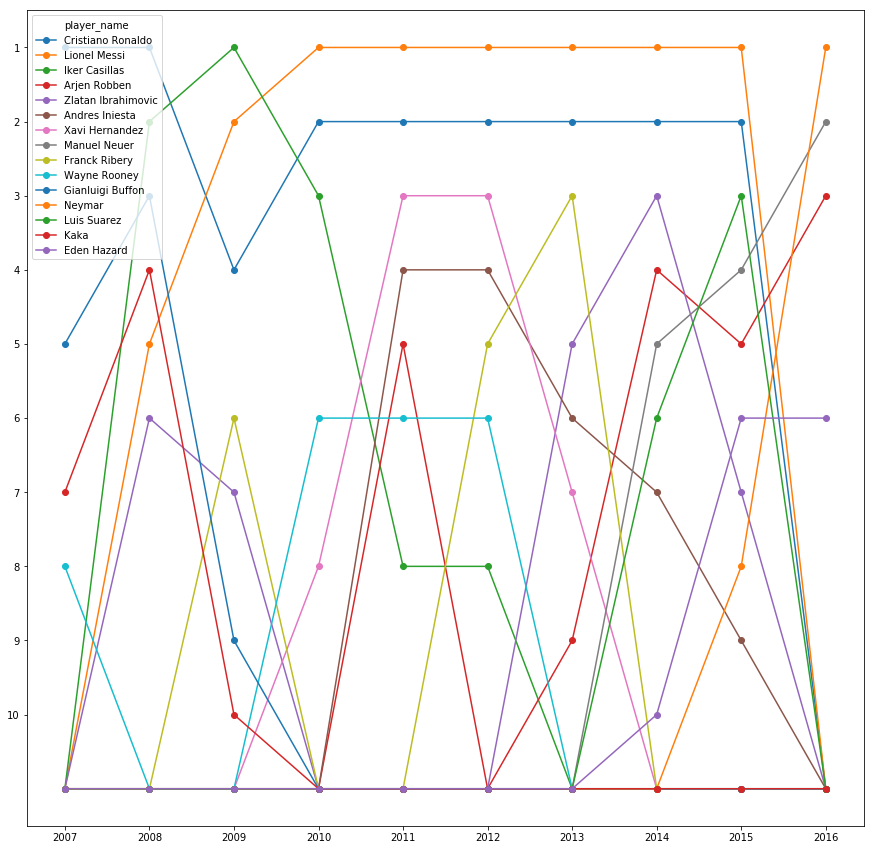

In [721]:
df_rank
#df['b'].plot(kind='bar', color='y')
df1_transposed.plot(kind='line',figsize=(15,15), marker='o')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.yticks(range(1,11))
ind = np.arange(10) 
plt.xticks(ind, ("2016","2015","2014","2013","2012","2011","2010","2009","2008","2007"))
plt.show();


# Finding Top Teams 

## League Teams 

In [594]:
df_comb_team = pd.merge(df_team, df_team_attributes, on="team_api_id")
df_comb_team.head(1)

,id_x,team_api_id,team_fifa_api_id_x,team_long_name,team_short_name,id_y,team_fifa_api_id_y,date,buildUpPlaySpeed,buildUpPlaySpeedClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,9987,673.0,KRC Genk,GEN,485,673,2010-02-22 00:00:00,45,Balanced,...,60,Normal,Organised,70,High,65,Press,70,Wide,Cover


In [29]:
# making the fuction 

In [30]:
import datetime as dt
df_comb_team['date'] = pd.to_datetime(df_comb_team['date'])

In [31]:
df_comb_team_2015 = df_comb_team[df_comb_team['date'].dt.year == 2015]
df_comb_team_2015 = df_comb_team_2015.sort_values('date').groupby('team_api_id').last()

In [32]:
df_comb_team_2015.head()

,id_x,team_fifa_api_id_x,team_long_name,team_short_name,id_y,team_fifa_api_id_y,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
team_api_id,,,,,,,,,,,,,,,,,,,,,
1601,31446,874.0,Ruch Chorzów,CHO,1118,874,2015-09-10,47,Balanced,48.0,...,50,Normal,Organised,43,Medium,44,Press,49,Normal,Cover
1957,31456,110745.0,Jagiellonia Białystok,BIA,624,110745,2015-09-10,66,Balanced,54.0,...,66,Normal,Organised,57,Medium,56,Press,49,Normal,Cover
2182,31453,873.0,Lech Poznań,POZ,700,873,2015-09-10,57,Balanced,50.0,...,67,Lots,Free Form,50,Medium,58,Press,45,Normal,Cover
2186,31458,110747.0,Cracovia,CKR,335,110747,2015-09-10,37,Balanced,50.0,...,33,Little,Organised,59,Medium,34,Press,64,Normal,Cover
4087,11822,111271.0,Évian Thonon Gaillard FC,ETG,415,111271,2015-09-10,58,Balanced,35.0,...,51,Normal,Organised,47,Medium,43,Press,50,Normal,Cover


In [545]:
import datetime as dt

def end_of_year_player(df_comb_player,year):
    df_comb_player['date'] = pd.to_datetime(df_comb_player['date'])
    df_comb_player = df_comb_player[df_comb_player['date'].dt.year == year]
    df_comb_player = df_comb_player.sort_values('date').groupby('player_api_id').last()    
    df_comb_player.reset_index(level=0, inplace=True)
    return df_comb_player[['player_api_id','player_name', 'date', 'overall_rating', 'potential']]


def end_of_year_team(df_comb_team):
    df_comb_team['date'] = pd.to_datetime(df_comb_team['date'])
    df_comb_team = df_comb_team[df_comb_team['date'].dt.year == 2015]
    df_comb_team = df_comb_team.sort_values('date').groupby('team_api_id').last()
    df_comb_team.reset_index(level=0, inplace=True)
    return df_comb_team[['team_api_id','team_long_name','date']]

def team_to_player(df_match,season):
    df_match = df_match[df_match.season== season ]
    players_list_home = ['home_team_api_id','home_player_1', 'home_player_2', 'home_player_3',
   'home_player_4', 'home_player_5', 'home_player_6', 'home_player_7',
   'home_player_8', 'home_player_9', 'home_player_10', 'home_player_11']
    df_team_to_player = df_match[players_list_home]
    df_team_to_player=df_team_to_player_2015.melt(['home_team_api_id']).sort_values('home_team_api_id')
    df_team_to_player = df_team_to_player[["home_team_api_id","value"]]
    df_team_to_player.rename( columns={"value":"player_api_id", "home_team_api_id":"team_api_id" },inplace=True)
    df_team_to_player = df_team_to_player.drop_duplicates()
    return df_team_to_player
    
    
def top_N_team(df_comb_team,df_comb_player,df_match,season="2015/2016",n=5):
    year = int(season.split("/")[0])
    df_end_of_year_team = end_of_year_team(df_comb_team)
    df_end_of_year_player = end_of_year_player(df_comb_player,year)
    df_team_to_player = team_to_player(df_match,season)
    df_end_of_year_player = pd.merge(df_end_of_year_player, df_team_to_player, on="player_api_id")
    df_comb_player_team_group= df_end_of_year_player.sort_values('overall_rating').groupby('team_api_id').head(15)
    df_comb_player_team_group = df_comb_player_team_group.sort_values('overall_rating').groupby('team_api_id').sum()
    df_top = pd.merge(df_comb_player_team_group,df_end_of_year_team,on="team_api_id")
    df_top = df_top[["team_api_id","overall_rating","team_long_name"]]
    df_top = df_top.sort_values("overall_rating")
    return df_top[-n:]

In [562]:
df = top_N_team(df_comb_team,df_comb_player,df_match,season="2015/2016")
df.index = range(len(df.index),0,-1)
df_rank = df[['team_api_id', 'team_long_name']]
df_rank.reset_index(level=0, inplace=True)
df_rank.rename( columns={"index":"rank1"},inplace=True)


In [563]:
df

,team_api_id,overall_rating,team_long_name
5,9885,1181.0,Juventus
4,8633,1183.0,Real Madrid CF
3,8456,1189.0,Manchester City
2,8634,1207.0,FC Barcelona
1,9823,1211.0,FC Bayern Munich


In [577]:
df = top_N_team(df_comb_team,df_comb_player,df_match,season="2014/2015")
df.index = range(len(df.index),0,-1)
df = df[['team_api_id', 'team_long_name']]
#df_rank = pd.merge(df_rank,df,on=["team_api_id","team_long_name"])
df.reset_index(level=0, inplace=True)
df.rename( columns={"index":"rank2"},inplace=True)
df_rank = pd.merge(df_rank,df,on=["team_api_id","team_long_name"],how='outer')
df

/home/abhik/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: FutureWarning: 'team_long_name' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


,rank2,team_api_id,team_long_name
0,5,9789,Borussia Dortmund
1,4,8633,Real Madrid CF
2,3,8634,FC Barcelona
3,2,9823,FC Bayern Munich
4,1,8456,Manchester City


In [565]:
df = top_N_team(df_comb_team,df_comb_player,df_match,season="2013/2014")
df = df[['team_api_id', 'team_long_name']]
df.index = range(len(df.index),0,-1)
#df_rank = pd.merge(df_rank,df[['team_api_id', 'team_long_name']],on=["team_api_id","team_long_name"])
df.reset_index(level=0, inplace=True)
df.rename( columns={"index":"rank3"},inplace=True)
df_rank = pd.merge(df_rank,df,on=["team_api_id","team_long_name"],how='outer')
df_rank

,rank1,team_api_id,team_long_name,rank3
0,5.0,9885,Juventus,NaN
1,4.0,8633,Real Madrid CF,3.0
2,3.0,8456,Manchester City,1.0
3,2.0,8634,FC Barcelona,5.0
4,1.0,9823,FC Bayern Munich,2.0
5,NaN,9789,Borussia Dortmund,4.0


In [566]:
df = top_N_team(df_comb_team,df_comb_player,df_match,season="2012/2013")
df = df[['team_api_id', 'team_long_name']]
df.index = range(len(df.index),0,-1)
#df_rank = pd.merge(df_rank,df[['team_api_id', 'team_long_name']],on=["team_api_id","team_long_name"])
df.reset_index(level=0, inplace=True)
df.rename( columns={"index":"rank4"},inplace=True)
df_rank = pd.merge(df_rank,df,on=["team_api_id","team_long_name"],how='outer')
df

,rank4,team_api_id,team_long_name
0,5,9825,Arsenal
1,4,8455,Chelsea
2,3,8456,Manchester City
3,2,8634,FC Barcelona
4,1,9823,FC Bayern Munich


In [567]:
df = top_N_team(df_comb_team,df_comb_player,df_match,season="2011/2012")
df = df[['team_api_id', 'team_long_name']]
df.index = range(len(df.index),0,-1)
df.reset_index(level=0, inplace=True)
df.rename( columns={"index":"rank5"},inplace=True)

df_rank = pd.merge(df_rank,df,on=["team_api_id","team_long_name"],how='outer')
df

,rank5,team_api_id,team_long_name
0,5,9825,Arsenal
1,4,8634,FC Barcelona
2,3,9823,FC Bayern Munich
3,2,8456,Manchester City
4,1,8455,Chelsea


In [568]:
df = top_N_team(df_comb_team,df_comb_player,df_match,season="2010/2011")
df = df[['team_api_id', 'team_long_name']]
df.index = range(len(df.index),0,-1)
df.reset_index(level=0, inplace=True)
df.rename( columns={"index":"rank6"},inplace=True)
df_rank = pd.merge(df_rank,df,on=["team_api_id","team_long_name"],how='outer')
df

,rank6,team_api_id,team_long_name
0,5,8634,FC Barcelona
1,4,8455,Chelsea
2,3,8456,Manchester City
3,2,8633,Real Madrid CF
4,1,10260,Manchester United


In [569]:
df = top_N_team(df_comb_team,df_comb_player,df_match,season="2009/2010")
df = df[['team_api_id', 'team_long_name']]
df.index = range(len(df.index),0,-1)
df.reset_index(level=0, inplace=True)
df.rename( columns={"index":"rank7"},inplace=True)
df_rank = pd.merge(df_rank,df,on=["team_api_id","team_long_name"],how='outer')
df

,rank7,team_api_id,team_long_name
0,5,9825,Arsenal
1,4,8456,Manchester City
2,3,9885,Juventus
3,2,9823,FC Bayern Munich
4,1,8634,FC Barcelona


In [570]:
df = top_N_team(df_comb_team,df_comb_player,df_match,season="2008/2009")
df = df[['team_api_id', 'team_long_name']]
df.index = range(len(df.index),0,-1)
df.reset_index(level=0, inplace=True)
df.rename( columns={"index":"rank8"},inplace=True)
df_rank = pd.merge(df_rank,df,on=["team_api_id","team_long_name"],how='outer')
df

,rank8,team_api_id,team_long_name
0,5,8564,Milan
1,4,8533,Chievo Verona
2,3,8634,FC Barcelona
3,2,9825,Arsenal
4,1,8456,Manchester City


In [571]:
df = top_N_team(df_comb_team,df_comb_player,df_match,season="2008/2009")
df = df[['team_api_id', 'team_long_name']]
df.index = range(len(df.index),0,-1)
df.reset_index(level=0, inplace=True)
df.rename( columns={"index":"rank9"},inplace=True)
df_rank = pd.merge(df_rank,df,on=["team_api_id","team_long_name"],how='outer')
df

,rank9,team_api_id,team_long_name
0,5,8564,Milan
1,4,8533,Chievo Verona
2,3,8634,FC Barcelona
3,2,9825,Arsenal
4,1,8456,Manchester City


In [572]:
df = top_N_team(df_comb_team,df_comb_player,df_match,season="2007/2008")
df = df[['team_api_id', 'team_long_name']]
df.index = range(len(df.index),0,-1)
df.reset_index(level=0, inplace=True)
df.rename( columns={"index":"rank10"},inplace=True)
df_rank = pd.merge(df_rank,df,on=["team_api_id","team_long_name"],how='outer')
df

,rank10,team_api_id,team_long_name
0,5,9768,Sporting CP
1,4,9823,FC Bayern Munich
2,3,8634,FC Barcelona
3,2,8633,Real Madrid CF
4,1,8456,Manchester City


In [576]:
df_rank

,rank1,team_api_id,team_long_name,rank3,rank4,rank5,rank6,rank7,rank8,rank9,rank10
team_long_name,,,,,,,,,,,
Juventus,5.0,9885,Juventus,6.0,6.0,6.0,6.0,3.0,6.0,6.0,6.0
Real Madrid CF,4.0,8633,Real Madrid CF,3.0,6.0,6.0,2.0,6.0,6.0,6.0,2.0
Manchester City,3.0,8456,Manchester City,1.0,3.0,2.0,3.0,4.0,1.0,1.0,1.0
FC Barcelona,2.0,8634,FC Barcelona,5.0,2.0,4.0,5.0,1.0,3.0,3.0,3.0
FC Bayern Munich,1.0,9823,FC Bayern Munich,2.0,1.0,3.0,6.0,2.0,6.0,6.0,4.0
Borussia Dortmund,6.0,9789,Borussia Dortmund,4.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
Arsenal,6.0,9825,Arsenal,6.0,5.0,5.0,6.0,5.0,2.0,2.0,6.0
Chelsea,6.0,8455,Chelsea,6.0,4.0,1.0,4.0,6.0,6.0,6.0,6.0
Manchester United,6.0,10260,Manchester United,6.0,6.0,6.0,1.0,6.0,6.0,6.0,6.0


In [579]:
df_rank
df_rank = df_rank.replace(np.NaN,6)
df_rank.index = df_rank.team_long_name
df_rank = df_rank[[ 'rank1', 'rank2',
       'rank3', 'rank4', 'rank5', 'rank6', 'rank7', 'rank8', 'rank9',
       'rank10']]

In [580]:
#df.pivot(index = "team_long_name")
df1_transposed = df_rank.T

In [581]:
df1_transposed

team_long_name,Juventus,Real Madrid CF,Manchester City,FC Barcelona,FC Bayern Munich,Borussia Dortmund,Arsenal,Chelsea,Manchester United,Milan,Chievo Verona,Sporting CP
rank1,5.0,4.0,3.0,2.0,1.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
rank2,6.0,4.0,1.0,3.0,2.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0
rank3,6.0,3.0,1.0,5.0,2.0,4.0,6.0,6.0,6.0,6.0,6.0,6.0
rank4,6.0,6.0,3.0,2.0,1.0,6.0,5.0,4.0,6.0,6.0,6.0,6.0
rank5,6.0,6.0,2.0,4.0,3.0,6.0,5.0,1.0,6.0,6.0,6.0,6.0
rank6,6.0,2.0,3.0,5.0,6.0,6.0,6.0,4.0,1.0,6.0,6.0,6.0
rank7,3.0,6.0,4.0,1.0,2.0,6.0,5.0,6.0,6.0,6.0,6.0,6.0
rank8,6.0,6.0,1.0,3.0,6.0,6.0,2.0,6.0,6.0,5.0,4.0,6.0
rank9,6.0,6.0,1.0,3.0,6.0,6.0,2.0,6.0,6.0,5.0,4.0,6.0
rank10,6.0,2.0,1.0,3.0,4.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0


In [582]:
df1_transposed

team_long_name,Juventus,Real Madrid CF,Manchester City,FC Barcelona,FC Bayern Munich,Borussia Dortmund,Arsenal,Chelsea,Manchester United,Milan,Chievo Verona,Sporting CP
rank1,5.0,4.0,3.0,2.0,1.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
rank2,6.0,4.0,1.0,3.0,2.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0
rank3,6.0,3.0,1.0,5.0,2.0,4.0,6.0,6.0,6.0,6.0,6.0,6.0
rank4,6.0,6.0,3.0,2.0,1.0,6.0,5.0,4.0,6.0,6.0,6.0,6.0
rank5,6.0,6.0,2.0,4.0,3.0,6.0,5.0,1.0,6.0,6.0,6.0,6.0
rank6,6.0,2.0,3.0,5.0,6.0,6.0,6.0,4.0,1.0,6.0,6.0,6.0
rank7,3.0,6.0,4.0,1.0,2.0,6.0,5.0,6.0,6.0,6.0,6.0,6.0
rank8,6.0,6.0,1.0,3.0,6.0,6.0,2.0,6.0,6.0,5.0,4.0,6.0
rank9,6.0,6.0,1.0,3.0,6.0,6.0,2.0,6.0,6.0,5.0,4.0,6.0
rank10,6.0,2.0,1.0,3.0,4.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0


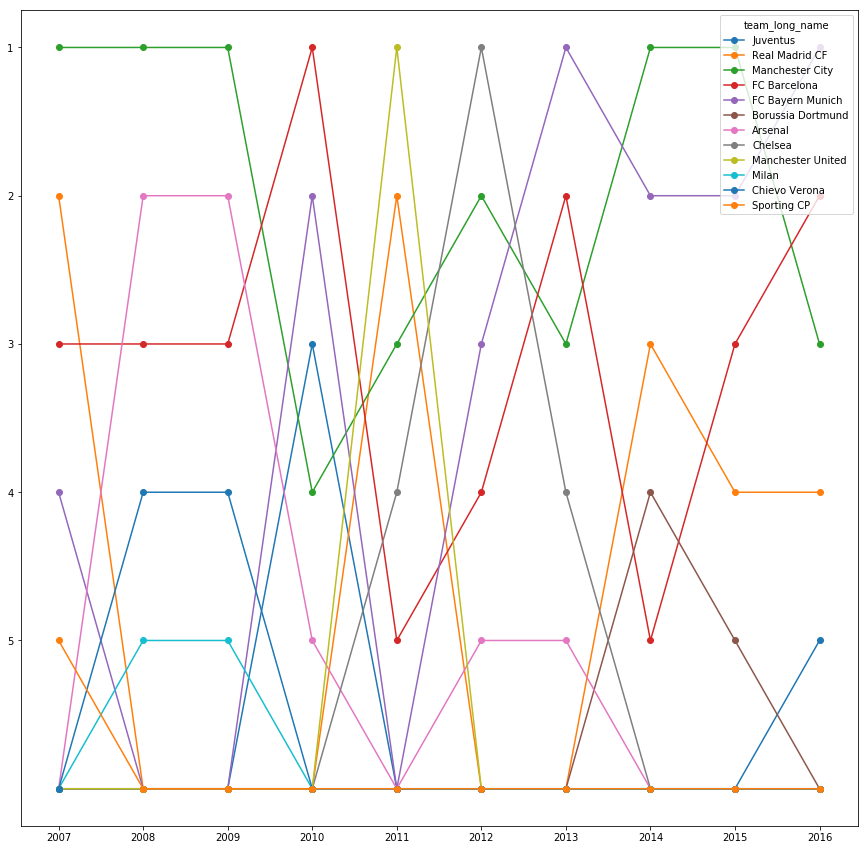

In [589]:
df_rank
#df['b'].plot(kind='bar', color='y')
df1_transposed.plot(kind='line',figsize=(15,15), marker='o')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.yticks(range(1,6))
ind = np.arange(10) 
plt.xticks(ind, ("2016","2015","2014","2013","2012","2011","2010","2009","2008","2007"))
plt.show();
